In [237]:
# model 套件
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PowerTransformer
import math
import warnings
warnings.filterwarnings('ignore')


# Second Preprocessing

In [238]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

In [239]:
# 處理 data 套件
import numpy as np
import pandas as pd

In [240]:
# let column can show all
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [241]:
df = pd.read_csv('Data/BayesianRidge_Pre_3/Input_A3_017.csv')
# df1 = pd.read_csv('Input_C_057.csv')
# df2 = pd.read_csv('Input_C_050.csv')

In [242]:
title = ['Input_A3_019','Input_A1_016','Input_A4_016','Input_A2_019','Input_A1_018']

# title = ['Input_A3_019','Input_A1_016','Input_A4_016','Input_A2_019',
#         'Input_A1_018','Input_A5_016','Input_A4_019']

In [243]:
# 直接執行轉換拉到最下面會發現 Wraninig
for col in title: # Predict 不做轉換
    if abs(df[col].skew()) >= 0.7: # 取偏態絕對值大於 0.5的項
        print(col)
        pt = PowerTransformer() # PowerTransformer 預設為 Yeo-Johson 轉換可轉正負數，不同於另一種 Box-Cox 只能用於正數
        d = pt.fit_transform(df[col].values.reshape(-1, 1)).flatten()
        df[col]=d

In [244]:
X = df[title]
scaler = RobustScaler()
df[title] = scaler.fit_transform(X)
y = df['Predict']

In [245]:
def pMSE(ans,predict):
    pmse = math.sqrt(sum(pow((ans - predict)/ans*100,2)/len(ans)))
    return pmse

In [246]:
def pNumber(ans,predict,num):
    return sum(abs((ans-predict)/ans*100) < num)

# Split data

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# LassoCV

In [248]:
lasso = LassoCV(alphas=[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30],random_state = 42)
lasso.fit(X_train,y_train)
alpha = lasso.alpha_
print("first best alpha:", alpha)
lasso = LassoCV(alphas=[0.00004, 0.00008, 0.0001, 0.0003, 0.0006],random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("second best alpha:", alpha)
lasso = LassoCV(alphas=[0.0001 + i/100000 for i in range(1, 20)], random_state = 42)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("final best alpha:", alpha)

first best alpha: 1e-05
second best alpha: 4e-05
final best alpha: 0.00011


In [249]:
y_pred = lasso.predict(X_test)

In [250]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: -0.0000


In [251]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: 86.53


In [252]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 20


In [253]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.013357


In [254]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      60.453506
std       62.209961
min        6.362379
10%        6.362379
20%       29.771784
30%       29.771784
40%       31.908714
50%       40.456432
60%       40.456432
70%       43.817427
80%       98.655602
90%      180.912863
max      180.912863
Name: Predict, dtype: float64

In [255]:
lasso.coef_

array([0., 0., 0., 0., 0.])

# Linear regresssion

In [256]:
# 建立一個線性回歸模型
regr = LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(X_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(X_test)

In [257]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.6f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 0.000076


In [258]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.008713


In [259]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.5745


In [260]:
print("Percentage mse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage mse score: 45.15


In [261]:
# y_test : len 103
print("Number lower than error: %d"   
      % pNumber(y_test, y_pred, 15))

Number lower than error: 44


In [262]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      30.811935
std       33.162460
min        0.026310
10%        2.142202
20%        7.194131
30%       11.006103
40%       14.747952
50%       18.536408
60%       22.918185
70%       32.631680
80%       52.131393
90%       77.409274
max      166.855867
Name: Predict, dtype: float64

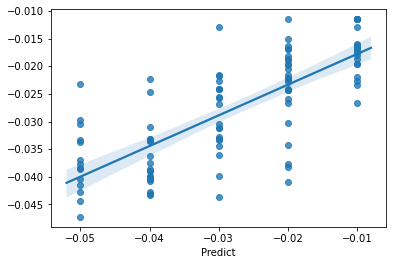

In [263]:
from matplotlib import pyplot as plt
import seaborn as sb
%matplotlib inline
sb.regplot(y_test, y_pred)

In [264]:
# p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
# If p-value <= alpha (0.05) : Reject H0 => need Normally distributed
# If p-value > alpha (0.05) : Accept H0 
from statsmodels.stats.diagnostic import normal_ad
normal_ad(y_test - y_pred)

(0.5778618584619721, 0.1298992574048187)

# XGBoost regression

In [265]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,KFold
from scipy.stats import skew


# 先調 booster / n_estimators

In [266]:
#for tuning parameters
parameters_for_testing = {
    'booster':['gbtree','gblinear','dart'],
    'n_estimators':range(10,201,10),
}

other_params = {'learning_rate': 0.1, 'n_estimators': 90, 'max_depth': 5, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0199s.) Setting batch_size=20.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 112 out of 180 | elapsed:    0.4s remaining:    0.2s


best params
{'booster': 'dart', 'n_estimators': 60}
best score
0.4303129107018569


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    1.7s finished


# 調 max_depth / min_child_weight

In [267]:
#for tuning parameters
parameters_for_testing = {
    'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10], 
    'min_child_weight': [1, 2, 3, 4, 5, 6]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 60, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0279s.) Setting batch_size=14.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  26 tasks      | elapsed:    0.2s


best params
{'max_depth': 1, 'min_child_weight': 1}
best score
0.4663367968217065


[Parallel(n_jobs=6)]: Done 180 out of 180 | elapsed:    0.5s finished


# 調 gamma

In [268]:
#for tuning parameters
parameters_for_testing = {
    'gamma': [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_alpha': 0, 'reg_lambda': 1}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
best params
{'gamma': 0}
best score
0.4663367968217065


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0339s.) Setting batch_size=10.
[Parallel(n_jobs=6)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=6)]: Done   7 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  21 out of  21 | elapsed:    0.0s finished


# 調 subsample / colsample_bytree

In [269]:
#for tuning parameters
parameters_for_testing = {
    'subsample': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'reg_alpha': 0, 'reg_lambda': 1, 'gamma':0}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train,y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0299s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Batch computation too fast (0.1446s.) Setting batch_size=32.


best params
{'colsample_bytree': 0.8, 'subsample': 0.5}
best score
0.47707253516468634


[Parallel(n_jobs=6)]: Done 192 out of 192 | elapsed:    0.6s finished


# reg_alpha / reg_lambda

In [270]:
#for tuning parameters
parameters_for_testing = {
    'reg_alpha': [0,0.05, 0.1, 0.5 , 1, 2, 3], 'reg_lambda': [0.05, 0.1, 0.5 , 1, 2, 3]
}

other_params = {'booster':'dart','learning_rate': 0.1, 'n_estimators': 60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.5,'colsample_bytree': 0.8}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 42 candidates, totalling 126 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0299s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'reg_alpha': 0, 'reg_lambda': 0.05}
best score
0.47868595594970215


[Parallel(n_jobs=6)]: Done  24 out of 126 | elapsed:    0.1s remaining:    0.8s
[Parallel(n_jobs=6)]: Done 102 out of 126 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 126 out of 126 | elapsed:    0.3s finished


# learning_rate

In [285]:
#for tuning parameters
parameters_for_testing = {
   'learning_rate': [0.01, 0.05, 0.08, 0.1,0.2,0.3]
}

other_params = {'booster':'dart', '_estimators':60, 'max_depth': 1, 'min_child_weight': 1, 'seed': 42,
 'gamma':0,'subsample':0.5,'colsample_bytree': 0.8,'reg_alpha': 0, 'reg_lambda': 0.05}

xgb_model = XGBRegressor(**other_params)
gsearch = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

#print (gsearch1.cv_results_)
print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[00:01:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { _estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


best params
{'learning_rate': 0.087}
best score
0.46897918709865055


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0299s.) Setting batch_size=12.
[Parallel(n_jobs=6)]: Done   3 out of  18 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=6)]: Done   5 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   7 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done   9 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  11 out of  18 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  18 out of  18 | elapsed:    0.1s finished


In [286]:
best_xgb_model = XGBRegressor(
              learning_rate = 0.08,
              booster = 'dart', 
              n_estimators = 60, 
              max_depth = 1, 
              min_child_weight = 1,
              seed = 42,
              gamma = 0,
              subsample = 0.5,
              colsample_bytree = 0.8,
              reg_alpha =  0,
              reg_lambda = 0.05)

best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.08, max_delta_step=0, max_depth=1,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=60, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=0.05, scale_pos_weight=1, seed=42, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [287]:
y_pred = best_xgb_model.predict(X_test)

In [288]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test,y_pred))

R2 score: 0.4981


In [289]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test,y_pred))

Percentage rmse score: 36.84


In [290]:
print("Number lower than error: %d"
      % pNumber(y_test, y_pred, 15))

Number lower than error: 30


In [291]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error: 0.009463


In [292]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      29.311046
std       22.422039
min        0.484880
10%        4.639657
20%        9.811624
30%       15.677339
40%       21.672642
50%       26.732481
60%       30.805047
70%       37.844694
80%       43.925619
90%       56.146017
max      139.046216
Name: Predict, dtype: float64

In [293]:
# the score function displays the accuracy of the model which translates to how well the model 
# can accurately predict for a new datapoint.
print("XGBoost regression score: %.4f"
      % best_xgb_model.score(X_train,y_train))

XGBoost regression score: 0.4744


# DecisionTree

In [294]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(
            criterion ='mse', 
            random_state = 42
)

In [295]:
param_grid = {'max_depth': range(1,10,1),
              'min_samples_split': range(2,16,2)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0140s.) Setting batch_size=28.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done 189 out of 189 | elapsed:    0.1s finished


best params
{'max_depth': 4, 'min_samples_split': 10}
best score
0.45628639541898447


In [296]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,10,1)
              }
    
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 4,
            min_samples_split = 10,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0199s.) Setting batch_size=20.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s


best params
{'max_leaf_nodes': 9, 'min_samples_leaf': 9}
best score
0.46504106132484907


[Parallel(n_jobs=6)]: Done 216 out of 216 | elapsed:    0.1s finished


In [297]:
clf = DecisionTreeRegressor(
            criterion ='mse', 
            max_depth = 4,
            min_samples_split = 10,
            max_leaf_nodes = 9,
            min_samples_leaf = 9,
            random_state = 42
)
# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

In [298]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.66717876 0.1070165  0.03347665 0.         0.19232809]


In [299]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.6110


In [300]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage rmse score: 40.90


In [301]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.008330


In [302]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      29.810785
std       28.140291
min        1.388889
10%        1.492537
20%        3.846154
30%       12.857143
40%       13.608466
50%       21.888889
60%       30.285714
70%       38.888889
80%       50.000000
90%       67.223881
max      107.692308
Name: Predict, dtype: float64

#  RandomForest

In [303]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(
          criterion ='mse', 
          random_state = 42
)

In [304]:
param_grid = {
              'n_estimators': range(5,51,5),
              'max_depth': range(1,10,1),
              'min_samples_split': range(2,10,1)}

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 720 candidates, totalling 2160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0199s.) Setting batch_size=20.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 172 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done 352 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 532 tasks      | elapsed:    2.6s
[Parallel(n_jobs=6)]: Done 752 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 972 tasks      | elapsed:    4.7s
[Parallel(n_jobs=6)]: Done 1232 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 1492 tasks      | elapsed:    7.7s
[Parallel(n_jobs=6)]: Done 1792 tasks      | elapsed:    9.2s


best params
{'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 10}
best score
0.5040781334170243


[Parallel(n_jobs=6)]: Done 2160 out of 2160 | elapsed:   11.1s finished


In [305]:
 param_grid = {
              "min_samples_leaf": range(1,10,1),
              "max_leaf_nodes": range(2,15,1)
              }
    
clf = RandomForestRegressor(
            criterion ='mse', 
            n_estimators = 10,
            max_depth = 3,
            min_samples_split = 3,
            random_state = 42
)

gsearch = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs=6,iid=False, verbose=10,scoring='r2')

gsearch.fit(X_train, y_train)

print('best params')
print (gsearch.best_params_)
print('best score')
print (gsearch.best_score_)

Fitting 3 folds for each of 117 candidates, totalling 351 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Batch computation too fast (0.0219s.) Setting batch_size=18.
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=6)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 156 tasks      | elapsed:    0.4s


best params
{'max_leaf_nodes': 7, 'min_samples_leaf': 1}
best score
0.503393694486971


[Parallel(n_jobs=6)]: Done 351 out of 351 | elapsed:    0.7s finished


In [306]:
clf = RandomForestRegressor( 
            criterion ='mse', 
            n_estimators =10,
            max_depth = 3,
            min_samples_split = 3,
            max_leaf_nodes = 7,
            min_samples_leaf = 1,
            random_state = 42) 
#給予max_depth 可以避免過度擬和

# 訓練模型
clf.fit(X_train, y_train)

# 預測測試集
y_pred = clf.predict(X_test)

In [307]:
print("Feature importance: ", clf.feature_importances_)

Feature importance:  [0.46013909 0.15729832 0.10799532 0.08512903 0.18943824]


In [308]:
# 預測值與實際值的差距，使用 r2_score ([0,1] 越大越好 )
print("R2 score: %.4f"
      % r2_score(y_test, y_pred))

R2 score: 0.6232


In [309]:
print("Percentage rmse score: %.2f"
      % pMSE(y_test, y_pred))

Percentage rmse score: 45.59


In [310]:
# 預測值與實際值的差距，使用 RMSE
print("Root mean squared error: %.6f"
      % math.sqrt(mean_squared_error(y_test, y_pred)))

Root mean squared error: 0.008198


In [311]:
p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
abs((y_test - y_pred)/y_test*100).describe(percentiles = p)

count    104.000000
mean      31.678239
std       32.941222
min        0.346832
10%        1.772263
20%        3.966747
30%        8.173382
40%       13.006150
50%       19.702910
60%       25.816646
70%       38.350703
80%       74.768362
90%       76.663644
max      142.805257
Name: Predict, dtype: float64

In [ ]:
# X = pd.concat([df[title], con1,con2], axis=1).to_numpy() 